In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.0.0-rc0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [6]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [9]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
np.max(X_train)

255

In [11]:
np.mean(X_train)

72.94035223214286

In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Data Exploration

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

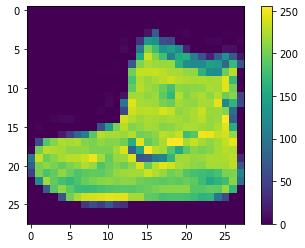

In [15]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [60]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [17]:
X_train = X_train/255.0
X_test = X_test/255.0

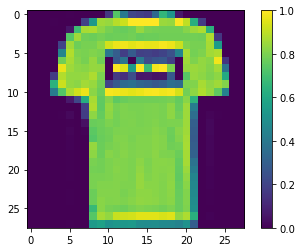

In [18]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

#### Build the model with TF 2.0

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [44]:
model = Sequential()
model.add(Flatten(input_shape = [28, 28]))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### model compilation
* loss
* optimizer
* metrics

In [46]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 123us/sample - loss: 0.4998 - accuracy: 0.8219 - val_loss: 0.3954 - val_accuracy: 0.8522
Epoch 2/10
48000/48000 [==============================] - 6s 119us/sample - loss: 0.3772 - accuracy: 0.8622 - val_loss: 0.3507 - val_accuracy: 0.8742
Epoch 3/10
48000/48000 [==============================] - 6s 119us/sample - loss: 0.3373 - accuracy: 0.8749 - val_loss: 0.3797 - val_accuracy: 0.8627
Epoch 4/10
48000/48000 [==============================] - 6s 121us/sample - loss: 0.3158 - accuracy: 0.8831 - val_loss: 0.3407 - val_accuracy: 0.8751
Epoch 5/10
48000/48000 [==============================] - 6s 120us/sample - loss: 0.2972 - accuracy: 0.8900 - val_loss: 0.3279 - val_accuracy: 0.8834
Epoch 6/10
48000/48000 [==============================] - 6s 121us/sample - loss: 0.2806 - accuracy: 0.8953 - val_loss: 0.3376 - val_accuracy: 0.8803
Epoch 7/10
48000/48000 [==========================

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

In [25]:
print(test_acc)

0.8856


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
y_pred = model.predict_classes(X_test)

In [28]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [29]:
accuracy_score(y_test, y_pred)

0.8856

In [30]:
pred = model.predict(X_test)

In [31]:
pred

array([[1.97528705e-09, 1.81778748e-09, 4.00606465e-10, ...,
        3.06832064e-02, 1.80689983e-06, 9.66933370e-01],
       [6.30213035e-05, 1.25163780e-14, 9.99759138e-01, ...,
        2.74863530e-14, 1.07455811e-09, 4.17021452e-13],
       [3.06868458e-07, 9.99999523e-01, 1.02825149e-12, ...,
        1.41112297e-24, 1.35799965e-11, 1.34424065e-15],
       ...,
       [1.29465494e-04, 5.95920036e-10, 1.51444809e-04, ...,
        8.97580748e-08, 9.97512817e-01, 9.43884693e-11],
       [1.08400421e-07, 9.99961615e-01, 3.10180187e-10, ...,
        3.55892497e-15, 1.02606690e-09, 2.11979295e-10],
       [3.82673134e-05, 8.46792983e-11, 4.05525097e-05, ...,
        1.15514372e-03, 2.67688953e-03, 1.82787699e-06]], dtype=float32)

In [32]:
pred[0]

array([1.9752870e-09, 1.8177875e-09, 4.0060646e-10, 1.1340124e-07,
       1.7881765e-08, 2.3812726e-03, 1.4621972e-07, 3.0683206e-02,
       1.8068998e-06, 9.6693337e-01], dtype=float32)

In [33]:
np.argmax(pred[0])

9

In [34]:
np.argmax(pred[1])

2

### Plotting Learning Curve and Confusion Matrix in TensorFlow 2.0

In [35]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense(32))
 |  model.add(Dense(32))
 |  model.co

In [48]:
history.history

{'loss': [0.49984929568852143,
  0.37723020720043376,
  0.3373150236872607,
  0.3157904885461176,
  0.29715974106332094,
  0.28059751128542604,
  0.27131429698684467,
  0.25953339397209374,
  0.24837325252775524,
  0.24309161314475053],
 'accuracy': [0.82189584,
  0.86216664,
  0.8749167,
  0.883125,
  0.89002085,
  0.8953125,
  0.89889586,
  0.9038333,
  0.90670836,
  0.90914583],
 'val_loss': [0.3954338276979979,
  0.3506641355372267,
  0.3797477750486966,
  0.34074544892723985,
  0.32794350336342176,
  0.33759838631250505,
  0.3411592785747295,
  0.3430404760599777,
  0.37023457519855585,
  0.3506097170733847],
 'val_accuracy': [0.85225,
  0.87425,
  0.86275,
  0.8750833,
  0.88341665,
  0.8803333,
  0.8789167,
  0.882,
  0.8774167,
  0.882]}

In [40]:
import matplotlib.pyplot as plt

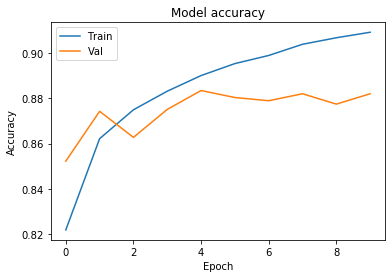

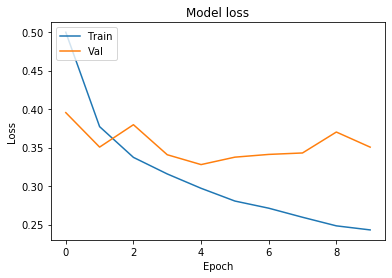

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()



### Plot confusion Matrix

In [67]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

(<Figure size 800x800 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9469df2400>)

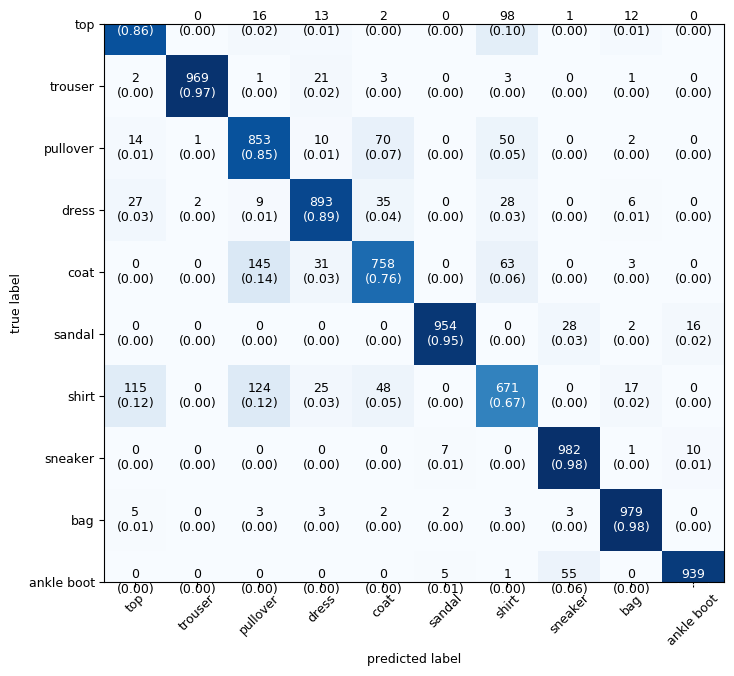

In [78]:
## reset the matplotlib settings
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

font = {
    'family': 'Time New Roman',
    'weight': 'regular',
    'size': 9
}
matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, 
                      figsize=(8, 8), 
                      class_names=class_names, 
                      show_normed=True
                     )